In [127]:
from rich import print as rprint
from rich.console import Console
from rich.panel import Panel
from rich.table import Table
import glob

console = Console()

import pandas as pd

# start_chunk = 0
# end_chunk = start_chunk + 100000
# df = pd.read_csv(f'2025_csv/new_amplitude_export_2025_chunk_{start_chunk}_{end_chunk}.csv')

def load_data(year=2025):
    """Load all CSV chunks for a given year and combine them into a single DataFrame."""
    csv_files = glob.glob(f"{year}_csv/*_chunk_*.csv")
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

df = load_data()

In [128]:
print(df.shape)
df[df['event_time'] == df['client_event_time']].shape


(1850109, 30)


(1850109, 30)

In [129]:
time_cols = ['client_event_time', 'client_upload_time', 'processed_time', 
             'server_received_time', 'server_upload_time']
for col in time_cols:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S.%f')

df['session_duration'] = (df.groupby('session_id')['client_event_time']
                         .transform(lambda x: x.max() - x.min()))

In [130]:
df['session_duration'].describe()

count                      1850109
mean     0 days 01:27:18.059801343
std      0 days 01:45:39.413711995
min                0 days 00:00:00
25%         0 days 00:15:00.616000
50%         0 days 00:52:43.826000
75%         0 days 01:57:25.307000
max         1 days 01:27:38.926000
Name: session_duration, dtype: object

In [131]:
print(df['session_duration'].min())
df[df['session_duration'] == df['session_duration'].min()].shape

0 days 00:00:00


(5417, 31)

In [132]:
# 1. Basic Dataset Information
# https://rich.readthedocs.io/en/stable/appendix/colors.html to refer to colors
console.print("\n[bold bright_green]1. Basic Dataset Information[/bold bright_green]", style="bold")
console.print(Panel(f"Dataset Shape: {df.shape}"))
console.print("\n[bright_yellow]Columns:[/bright_yellow]", df.columns.tolist())
console.print("\n[bright_yellow]Data Types:[/bright_yellow]")
console.print(df.dtypes)
console.print("\n[bright_yellow]Missing Values:[/bright_yellow]")
console.print(df.isnull().sum())

1. Basic Dataset Information

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Dataset Shape: (1850109, 31)                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Columns:
[
    '$insert_id',
    'amplitude_id',
    'app',
    'city',
    'client_event_time',
    'client_upload_time',
    'country',
    'data',
    'data_type',
    'device_family',
    'device_id',
    'device_type',
    'dma',
    'event_id',
    'event_properties',
    'event_time',
    'event_type',
    'language',
    'library',
    'os_name',
    'os_version',
    'platform',
    'processed_time',
    'region',
    'server_received_time',
    'server_upload_time',
    'session_id',
    'user_id',
    'user_properties',
    'uuid',
    'session_duration'
]

Data Types:

$insert_id                       object
amplitude_id                      int64
app                               int64
city                             object
client_event_time        datetime64[ns]
client_upload_time       datetime64[ns]
country                          object
data                             object
data_type                        object
device_family                    object
device_id                        object
device_type                      object
dma                              object
event_id                          int64
event_properties                 object
event_time                       object
event_type                       object
language                         object
library                          object
os_name                          object
os_version                        int64
platform                         object
processed_time           datetime64[ns]
region                           object
server_received_time     datetime64[ns]
server_upload_time       datetime64[ns]
session_id                        int64
user_id                          object
user_properties                  object
uuid                             object
session_duration        timedelta64[ns]
dtype: object

Missing Values:

$insert_id                   0
amplitude_id                 0
app                          0
city                     33543
client_event_time            0
client_upload_time           0
country                      0
data                         0
data_type                    0
device_family                0
device_id                    0
device_type             290193
dma                     512300
event_id                     0
event_properties             0
event_time                   0
event_type                   0
language                     0
library                      0
os_name                      0
os_version                   0
platform                     0
processed_time               0
region                   16521
server_received_time         0
server_upload_time           0
session_id                   0
user_id                   7389
user_properties              0
uuid                         0
session_duration             0
dtype: int64

In [133]:
# 2. User Activity Analysis
console.print("\n[bold bright_green]2. User Activity Analysis[/bold bright_green]", style="bold")
stats_table = Table(show_header=True, header_style="bold bright_yellow")
stats_table.add_column("Metric")
stats_table.add_column("Value")
stats_table.add_row("Unique Users", str(df['user_id'].nunique()))
stats_table.add_row("Unique Sessions", str(df['session_id'].nunique()))
stats_table.add_row("Events per User (Average)", f"{len(df) / df['user_id'].nunique():.2f}")
console.print(stats_table)

2. User Activity Analysis

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Metric                    ┃ Value   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ Unique Users              │ 868     │
│ Unique Sessions           │ 59868   │
│ Events per User (Average) │ 2131.46 │
└───────────────────────────┴─────────┘

In [134]:
# 3. Device & Platform Distribution
console.print("\n[bold bright_green]3. Device & Platform Distribution[/bold bright_green]", style="bold")
console.print("\n[bright_yellow]Device Distribution:[/bright_yellow]")
console.print(Panel(str(df['device_family'].value_counts(normalize=True).round(3) * 100)))
console.print("\n[bright_yellow]Platform Distribution:[/bright_yellow]")
console.print(Panel(str(df['platform'].value_counts(normalize=True).round(3) * 100)))

3. Device & Platform Distribution

Device Distribution:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ device_family                                                                                                   │
│ Windows     81.8                                                                                                │
│ Mac OS X    15.6                                                                                                │
│ Linux        2.5                                                                                                │
│ iOS          0.1                                                                                                │
│ Android      0.0                                                                                                │
│ Name: proportion, dtype: float64                                                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Platform Distribution:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ platform                                                                                                        │
│ Web    100.0                                                                                                    │
│ Name: proportion, dtype: float64                                                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [135]:
# 4. Geographic Distribution
console.print("\n[bold bright_green]4. Geographic Distribution[/bold bright_green]", style="bold")
console.print("\n[bright_yellow]Top 10 Cities:[/bright_yellow]")
console.print(Panel(str(df['city'].value_counts().head(10))))

console.print("\n[bright_yellow]State/Region Distribution:[/bright_yellow]")
console.print(Panel(str(df['region'].value_counts().head(10))))

4. Geographic Distribution

Top 10 Cities:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ city                                                                                                            │
│ Mumbai         399477                                                                                           │
│ Nashville      286693                                                                                           │
│ Spring Hill     74781                                                                                           │
│ Chicago         71692                                                                                           │
│ Birmingham      49854                                                                                           │
│ Greenville      45706                                                                                           │
│ Alexandria      38848                                                                                           │
│ Wroclaw         33788                                                                                           │
│ Phoenix         31894                                                                                           │
│ Des Moines      27699                                                                                           │
│ Name: count, dtype: int64                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

State/Region Distribution:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ region                                                                                                          │
│ Maharashtra       399477                                                                                        │
│ Tennessee         383475                                                                                        │
│ Illinois          103032                                                                                        │
│ Iowa               95680                                                                                        │
│ Georgia            75776                                                                                        │
│ South Carolina     74163                                                                                        │
│ Virginia           70494                                                                                        │
│ Alabama            68398                                                                                        │
│ California         66066                                                                                        │
│ Florida            60664                                                                                        │
│ Name: count, dtype: int64                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [136]:
# 5. Temporal Analysis
df['hour'] = df['client_event_time'].dt.hour
df['day_of_week'] = df['client_event_time'].dt.day_name()

console.print("\n[bold bright_green]5. Temporal Analysis[/bold bright_green]", style="bold")
console.print("\n[bright_yellow]Events by Hour of Day:[/bright_yellow]")
console.print(Panel(str(df['hour'].value_counts().sort_index())))

console.print("\n[bright_yellow]Events by Day of Week:[/bright_yellow]") 
console.print(Panel(str(df['day_of_week'].value_counts())))

5. Temporal Analysis

Events by Hour of Day:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ hour                                                                                                            │
│ 0      17412                                                                                                    │
│ 1      13352                                                                                                    │
│ 2      11367                                                                                                    │
│ 3      15187                                                                                                    │
│ 4      35544                                                                                                    │
│ 5      52265                                                                                                    │
│ 6      55000                                                                                                    │
│ 7      54778                                                                                                    │
│ 8      56650                                                                                                    │
│ 9      55150                                                                                                    │
│ 10     65470                                                                                                    │
│ 11     64175                                                                                                    │
│ 12     67925                                                                                                    │
│ 13     91591                                                                                                    │
│ 14    133045                                                                                                    │
│ 15    160241                                                                                                    │
│ 16    151129                                                                                                    │
│ 17    131961                                                                                                    │
│ 18    121523                                                                                                    │
│ 19    137684                                                                                                    │
│ 20    131027                                                                                                    │
│ 21    113741                                                                                                    │
│ 22     76740                                                                                                    │
│ 23     37152                                                                                                    │
│ Name: count, dtype: int64                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Events by Day of Week:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ day_of_week                                                                                                     │
│ Thursday     406228                                                                                             │
│ Tuesday      380958                                                                                             │
│ Friday       363600                                                                                             │
│ Monday       353517                                                                                             │
│ Wednesday    302410                                                                                             │
│ Saturday      25515                                                                                             │
│ Sunday        17881                                                                                             │
│ Name: count, dtype: int64                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [137]:
# 6. Session Analysis
console.print("\n[bold bright_green]6. Session Analysis[/bold bright_green]", style="bold")
console.print("\n[bright_yellow]Session Duration Statistics (in minutes):[/bright_yellow]")
stats_table = Table(show_header=True, header_style="bold bright_yellow")
stats_table.add_column("Metric")
stats_table.add_column("Value")

session_stats = df['session_duration'].dt.total_seconds().div(60).describe()
for stat, value in session_stats.items():
    stats_table.add_row(stat, f"{value:.2f}")

console.print(stats_table)

6. Session Analysis

Session Duration Statistics (in minutes):

┏━━━━━━━━┳━━━━━━━━━━━━┓
┃ Metric ┃ Value      ┃
┡━━━━━━━━╇━━━━━━━━━━━━┩
│ count  │ 1850109.00 │
│ mean   │ 87.30      │
│ std    │ 105.66     │
│ min    │ 0.00       │
│ 25%    │ 15.01      │
│ 50%    │ 52.73      │
│ 75%    │ 117.42     │
│ max    │ 1527.65    │
└────────┴────────────┘

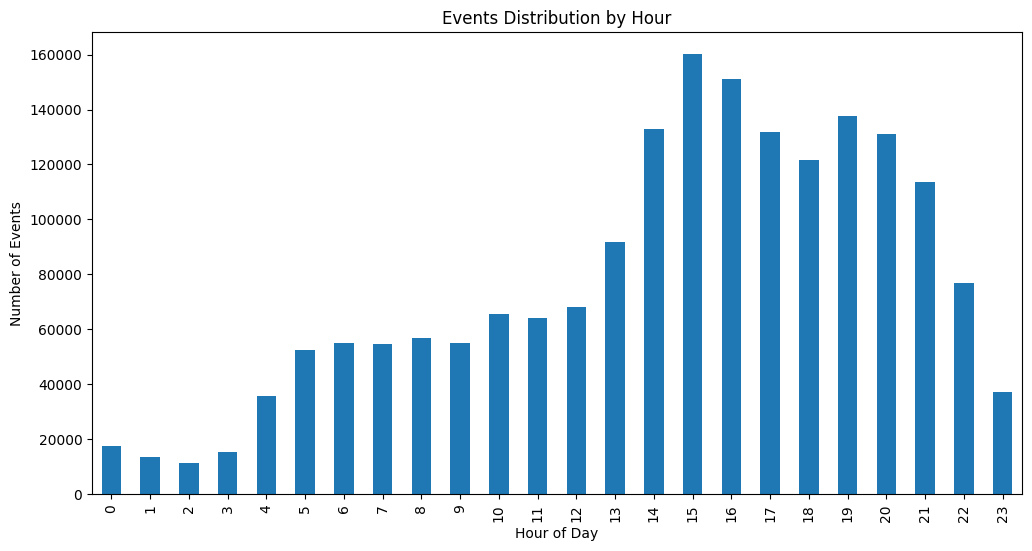

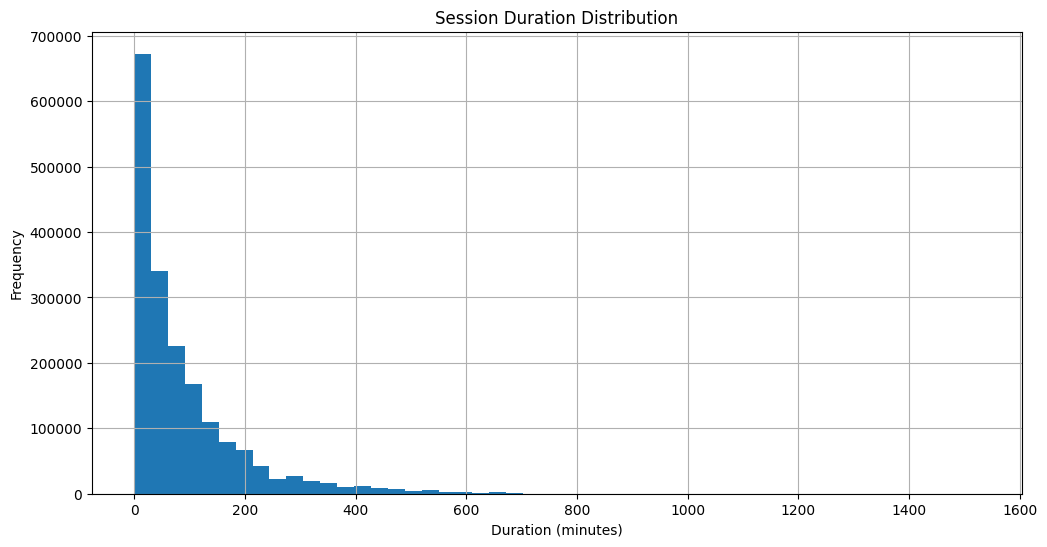

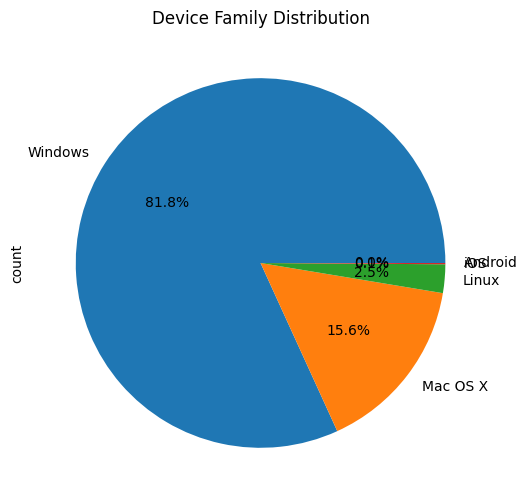

In [138]:
# 7. Create some visualizations using matplotlib
import matplotlib.pyplot as plt

# Events by Hour
plt.figure(figsize=(12, 6))
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Events Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.show()

# Session Duration Distribution
plt.figure(figsize=(12, 6))
df['session_duration'].dt.total_seconds().div(60).hist(bins=50)
plt.title('Session Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# Device Family Distribution
plt.figure(figsize=(10, 6))
df['device_family'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Device Family Distribution')
plt.show()

In [139]:
# 8. Statistical Summary
console.print("\n[bold bright_green]8. Statistical Summary[/bold bright_green]", style="bold")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
console.print("\n[bright_yellow]Numeric Columns Summary:[/bright_yellow]")
stats_df = df[numeric_cols].describe()
console.print(Panel(str(stats_df)))

8. Statistical Summary

Numeric Columns Summary:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│        amplitude_id        app      event_id    os_version    session_id                                        │
│ count  1.850109e+06  1850109.0  1.850109e+06  1.850109e+06  1.850109e+06                                        │
│ mean   9.249715e+11   591532.0  2.467088e+04  1.309072e+02  1.736952e+12                                        │
│ std    8.423445e+10        0.0  2.962611e+04  4.288231e+00  7.897269e+08                                        │
│ min    8.575404e+11   591532.0  0.000000e+00  4.000000e+00  1.713878e+12                                        │
│ 25%    8.575405e+11   591532.0  5.088000e+03  1.310000e+02  1.736367e+12                                        │
│ 50%    8.642186e+11   591532.0  1.448900e+04  1.310000e+02  1.736951e+12                                        │
│ 75%    1.018933e+12   591532.0  3.473700e+04  1.310000e+02  1.737569e+12                                        │
│ max    1.110665e+12   591532.0  1.977430e+05  1.340000e+02  1.738098e+12                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [140]:
# 9. Correlation Analysis
console.print("\n[bold bright_green]9. Correlation Analysis[/bold bright_green]", style="bold")
if len(numeric_cols) > 1:
    correlation = df[numeric_cols].corr()
    console.print("\n[bright_yellow]Correlation Matrix:[/bright_yellow]")
    console.print(Panel(str(correlation.round(2))))

9. Correlation Analysis

Correlation Matrix:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│               amplitude_id  app  event_id  os_version  session_id                                               │
│ amplitude_id          1.00  NaN     -0.24       -0.00        0.04                                               │
│ app                    NaN  NaN       NaN         NaN         NaN                                               │
│ event_id             -0.24  NaN      1.00        0.04        0.04                                               │
│ os_version           -0.00  NaN      0.04        1.00        0.04                                               │
│ session_id            0.04  NaN      0.04        0.04        1.00                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [141]:
# 10. Category Analysis (for categorical columns)
console.print("\n[bold bright_green]10. Category Analysis[/bold bright_green]", style="bold")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    console.print(f"\n[bright_yellow]Distribution of {col}:[/bright_yellow]")
    value_counts = df[col].value_counts().head(10)  # Top 10 categories
    counts_table = Table(show_header=True, header_style="bold bright_yellow")
    counts_table.add_column("Category")
    counts_table.add_column("Count")
    counts_table.add_column("Percentage")
    
    for idx, (cat, count) in enumerate(value_counts.items()):
        percentage = (count / len(df)) * 100
        counts_table.add_row(
            str(cat),
            str(count),
            f"{percentage:.2f}%"
        )
    console.print(counts_table)

10. Category Analysis

Distribution of $insert_id:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                             ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ 77c8efdb-f5bc-4a17-a59d-e9813cd39270 │ 2     │ 0.00%      │
│ 538ab3f8-09df-4750-90e0-abe8ad8f6a0c │ 1     │ 0.00%      │
│ 5dae3311-affb-422c-8fec-1c5539b68912 │ 1     │ 0.00%      │
│ 5df0bfb2-6999-43fb-b883-17ef72d258ad │ 1     │ 0.00%      │
│ 522d2ce9-6ba9-49ae-9add-cbae2861755d │ 1     │ 0.00%      │
│ 5f811132-d67d-4139-9cc6-d93ac287f844 │ 1     │ 0.00%      │
│ 3568cc57-a8d6-4748-8d09-51f49a66425d │ 1     │ 0.00%      │
│ 84953257-d359-45db-abaf-a60e6934ae2b │ 1     │ 0.00%      │
│ 31b62123-c9ae-48b2-b774-4e129edc59c0 │ 1     │ 0.00%      │
│ 6570d130-dc26-4d32-8138-aacb117a4633 │ 1     │ 0.00%      │
└──────────────────────────────────────┴───────┴────────────┘

Distribution of city:

┏━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category    ┃ Count  ┃ Percentage ┃
┡━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ Mumbai      │ 399477 │ 21.59%     │
│ Nashville   │ 286693 │ 15.50%     │
│ Spring Hill │ 74781  │ 4.04%      │
│ Chicago     │ 71692  │ 3.88%      │
│ Birmingham  │ 49854  │ 2.69%      │
│ Greenville  │ 45706  │ 2.47%      │
│ Alexandria  │ 38848  │ 2.10%      │
│ Wroclaw     │ 33788  │ 1.83%      │
│ Phoenix     │ 31894  │ 1.72%      │
│ Des Moines  │ 27699  │ 1.50%      │
└─────────────┴────────┴────────────┘

Distribution of country:

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category       ┃ Count   ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━┩
│ United States  │ 1370823 │ 74.09%     │
│ India          │ 399503  │ 21.59%     │
│ Poland         │ 52844   │ 2.86%      │
│ Canada         │ 23210   │ 1.25%      │
│ Mexico         │ 2782    │ 0.15%      │
│ United Kingdom │ 526     │ 0.03%      │
│ Costa Rica     │ 167     │ 0.01%      │
│ Singapore      │ 101     │ 0.01%      │
│ France         │ 78      │ 0.00%      │
│ Puerto Rico    │ 27      │ 0.00%      │
└────────────────┴─────────┴────────────┘

Distribution of data:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                                                                                 ┃ Count   ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━┩
│ {'path': '/2/httpapi', 'group_first_event': {}, 'group_ids': {}}                         │ 1830130 │ 98.92%     │
│ {'path': '/2/httpapi', 'user_properties_updated': 'True', 'group_first_event': {},       │ 19979   │ 1.08%      │
│ 'group_ids': {}}                                                                         │         │            │
└──────────────────────────────────────────────────────────────────────────────────────────┴─────────┴────────────┘

Distribution of data_type:

┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category ┃ Count   ┃ Percentage ┃
┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━┩
│ event    │ 1850109 │ 100.00%    │
└──────────┴─────────┴────────────┘

Distribution of device_family:

┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category ┃ Count   ┃ Percentage ┃
┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━┩
│ Windows  │ 1513654 │ 81.81%     │
│ Mac OS X │ 288172  │ 15.58%     │
│ Linux    │ 46239   │ 2.50%      │
│ iOS      │ 2021    │ 0.11%      │
│ Android  │ 23      │ 0.00%      │
└──────────┴─────────┴────────────┘

Distribution of device_id:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                             ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ 3aec3262-1bdd-4f39-ae25-5df72f3fbae6 │ 24486 │ 1.32%      │
│ a8806aff-7404-4c48-96f3-6bce38fe5f66 │ 22406 │ 1.21%      │
│ 3630e88e-c688-4abc-b81d-11da1cbebf47 │ 21747 │ 1.18%      │
│ 08deb711-f4f2-40f6-8939-e1673bf4e84c │ 21036 │ 1.14%      │
│ 107661f8-dbfb-4e97-9ad4-b97218423080 │ 20382 │ 1.10%      │
│ 0e96d208-bf73-44c8-be78-a74c1123c3f9 │ 20371 │ 1.10%      │
│ f32dd30f-34a2-48a9-8905-cce8ab9ec449 │ 19966 │ 1.08%      │
│ a8bf97c2-480e-41a2-bce9-9b54b4c10b01 │ 17661 │ 0.95%      │
│ d74d587c-f0b5-4a9e-8e56-cd0801842932 │ 17093 │ 0.92%      │
│ 5bb73f50-5f95-4c9f-92a8-a81b65f6bda1 │ 16073 │ 0.87%      │
└──────────────────────────────────────┴───────┴────────────┘

Distribution of device_type:

┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category ┃ Count   ┃ Percentage ┃
┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━┩
│ Windows  │ 1513654 │ 81.81%     │
│ Linux    │ 46239   │ 2.50%      │
│ Android  │ 23      │ 0.00%      │
└──────────┴─────────┴────────────┘

Distribution of dma:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                           ┃ Count  ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ Nashville, TN                      │ 366592 │ 19.81%     │
│ Chicago, IL                        │ 94724  │ 5.12%      │
│ Des Moines-Ames, IA                │ 83549  │ 4.52%      │
│ Greenville-Spartanburg, SC         │ 69668  │ 3.77%      │
│ Atlanta, GA                        │ 67746  │ 3.66%      │
│ Birmingham, AL                     │ 67256  │ 3.64%      │
│ New York, NY                       │ 63715  │ 3.44%      │
│ Washington, DC (Hagerstown, MD)    │ 62809  │ 3.39%      │
│ Phoenix, AZ                        │ 49749  │ 2.69%      │
│ San Francisco-Oakland-San Jose, CA │ 31538  │ 1.70%      │
└────────────────────────────────────┴────────┴────────────┘

Distribution of event_properties:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                                                                                  ┃ Count  ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ {}                                                                                        │ 134094 │ 7.25%      │
│ {'rowModel': 'client', 'slug': 'documents-and-compliance-table'}                          │ 17627  │ 0.95%      │
│ {'slug': 'my-book'}                                                                       │ 5397   │ 0.29%      │
│ {'slug': 'general'}                                                                       │ 4911   │ 0.27%      │
│ {'rowModel': 'client', 'id': 'de54a567-d72b-44a9-8658-15c4a0299738'}                      │ 4596   │ 0.25%      │
│ {'displayName': 'Basic Vehicle Details (Policy)', 'tableId':                              │ 4595   │ 0.25%      │
│ 'de54a567-d72b-44a9-8658-15c4a0299738', 'id': 'b87fadc2-83ff-4d76-b940-3dd78d0df21f',     │        │            │
│ 'type': 'table'}                                                                          │        │            │
│ {'displayName': 'Policy Detail Card', 'id': 'e59fbad1-399d-41fe-9c99-f4158e175c01',       │ 3994   │ 0.22%      │
│ 'type': 'built-in', 'slug': 'policy-detail-card'}                                         │        │            │
│ {'slug': 'auto'}                                                                          │ 3868   │ 0.21%      │
│ {'rowModel': 'legacyServer', 'slug': 'submission-history'}                                │ 3481   │ 0.19%      │
│ {'rowModel': 'client', 'id': '0d0df5a0-0460-45c8-b3e9-843abd1dd88e'}                      │ 3344   │ 0.18%      │
└───────────────────────────────────────────────────────────────────────────────────────────┴────────┴────────────┘

Distribution of event_time:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                   ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ 2024-06-27 13:48:19.271000 │ 432   │ 0.02%      │
│ 2024-09-10 04:43:50.596000 │ 257   │ 0.01%      │
│ 2024-12-19 19:03:01.542000 │ 186   │ 0.01%      │
│ 2024-04-23 13:09:22.416000 │ 179   │ 0.01%      │
│ 2025-01-24 18:01:29.934000 │ 73    │ 0.00%      │
│ 2024-10-01 18:00:43.174000 │ 52    │ 0.00%      │
│ 2024-08-12 17:16:07.950000 │ 48    │ 0.00%      │
│ 2024-12-24 21:28:22.671000 │ 44    │ 0.00%      │
│ 2024-05-16 01:53:12.545000 │ 30    │ 0.00%      │
│ 2024-11-20 18:40:12.806000 │ 29    │ 0.00%      │
└────────────────────────────┴───────┴────────────┘

Distribution of event_type:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                                    ┃ Count  ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ account-lines::widget:render                │ 428058 │ 23.14%     │
│ account-lines::configurable-table:render    │ 257224 │ 13.90%     │
│ account-lines:::view                        │ 108249 │ 5.85%      │
│ dashboard:my-book:configurable-table:render │ 105443 │ 5.70%      │
│ account-lines::layout:render                │ 104682 │ 5.66%      │
│ dashboard:my-book:widget:render             │ 99140  │ 5.36%      │
│ account:::view                              │ 64694  │ 3.50%      │
│ session_start                               │ 58762  │ 3.18%      │
│ session_end                                 │ 51610  │ 2.79%      │
│ application-window-opened                   │ 47245  │ 2.55%      │
└─────────────────────────────────────────────┴────────┴────────────┘

Distribution of language:

┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category ┃ Count   ┃ Percentage ┃
┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━┩
│ English  │ 1826082 │ 98.70%     │
│ Polish   │ 22051   │ 1.19%      │
│ Spanish  │ 1976    │ 0.11%      │
└──────────┴─────────┴────────────┘

Distribution of library:

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category           ┃ Count   ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━┩
│ amplitude-ts/2.7.2 │ 1850109 │ 100.00%    │
└────────────────────┴─────────┴────────────┘

Distribution of os_name:

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category          ┃ Count   ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━┩
│ Chrome            │ 1707543 │ 92.29%     │
│ Edge              │ 131340  │ 7.10%      │
│ Firefox           │ 8543    │ 0.46%      │
│ Mobile Safari     │ 1822    │ 0.10%      │
│ Safari            │ 637     │ 0.03%      │
│ Chrome Mobile iOS │ 163     │ 0.01%      │
│ Edge Mobile       │ 36      │ 0.00%      │
│ Chrome Mobile     │ 22      │ 0.00%      │
│ HeadlessChrome    │ 2       │ 0.00%      │
│ android           │ 1       │ 0.00%      │
└───────────────────┴─────────┴────────────┘

Distribution of platform:

┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category ┃ Count   ┃ Percentage ┃
┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━┩
│ Web      │ 1850109 │ 100.00%    │
└──────────┴─────────┴────────────┘

Distribution of region:

┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category       ┃ Count  ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ Maharashtra    │ 399477 │ 21.59%     │
│ Tennessee      │ 383475 │ 20.73%     │
│ Illinois       │ 103032 │ 5.57%      │
│ Iowa           │ 95680  │ 5.17%      │
│ Georgia        │ 75776  │ 4.10%      │
│ South Carolina │ 74163  │ 4.01%      │
│ Virginia       │ 70494  │ 3.81%      │
│ Alabama        │ 68398  │ 3.70%      │
│ California     │ 66066  │ 3.57%      │
│ Florida        │ 60664  │ 3.28%      │
└────────────────┴────────┴────────────┘

Distribution of user_id:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                             ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ 0c4896b7-08fa-4cb4-852f-27ad584f0864 │ 45035 │ 2.43%      │
│ 1b992a40-b2c3-4b69-a5bc-05711eeddd80 │ 39783 │ 2.15%      │
│ EMPTY                                │ 31120 │ 1.68%      │
│ bb8fa1af-a540-4d0f-a633-569c61f01281 │ 26015 │ 1.41%      │
│ e309f160-ed02-4c6c-84bb-33bab8749186 │ 24486 │ 1.32%      │
│ 1b7f0cbc-e5b9-494f-af08-f8e19df60576 │ 22362 │ 1.21%      │
│ c774e8c0-4817-4b51-962a-ac7c051d0470 │ 21852 │ 1.18%      │
│ b5e87951-22bd-4333-9a0d-ae28ecabe804 │ 21747 │ 1.18%      │
│ cfa20420-326e-4d5a-b202-c04084e785ad │ 21036 │ 1.14%      │
│ 6066f244-0707-4e85-9fc5-70e6fefdea0b │ 20382 │ 1.10%      │
└──────────────────────────────────────┴───────┴────────────┘

Distribution of user_properties:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                                                                                  ┃ Count  ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ {'businessUnit': [], 'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'EMPTY',  │ 512831 │ 27.72%     │
│ 'initial_utm_content': 'EMPTY', 'roles': ['underwriter'], 'isInternalUser': 'False',      │        │            │
│ 'trackingVersion': '3.1', 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EMPTY',     │        │            │
│ 'initial_li_fat_id': 'EMPTY', 'initial_gclid': 'EMPTY', 'hostname': 'None',               │        │            │
│ 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY',       │        │            │
│ 'initial_rtd_cid': 'EMPTY', 'initial_fbclid': 'EMPTY', 'initial_utm_id': 'EMPTY',         │        │            │
│ 'initial_gbraid': 'EMPTY', 'initial_referrer': 'EMPTY', 'initial_msclkid': 'EMPTY',       │        │            │
│ 'initial_ttclid': 'EMPTY', 'initial_utm_term': 'EMPTY', 'initial_ko_click_id': 'EMPTY'}   │        │            │
│ {'businessUnit': [], 'roles': ['underwriter'], 'trackingVersion': '3.1',                  │ 135196 │ 7.31%      │
│ 'initial_twclid': 'EMPTY', 'initial_gclid': 'EMPTY', 'hostname': 'None',                  │        │            │
│ 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY',       │        │            │
│ 'initial_rtd_cid': 'EMPTY', 'initial_utm_id': 'EMPTY', 'initial_gbraid': 'EMPTY',         │        │            │
│ 'initial_msclkid': 'EMPTY', 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY',    │        │            │
│ 'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'EMPTY',                       │        │            │
│ 'initial_utm_content': 'EMPTY', 'isInternalUser': 'False', 'initial_utm_campaign':        │        │            │
│ 'EMPTY', 'initial_li_fat_id': 'EMPTY', 'referrer': 'https://accounts.google.com/',        │        │            │
│ 'initial_fbclid': 'EMPTY', 'initial_referrer': 'EMPTY', 'initial_utm_term': 'EMPTY',      │        │            │
│ 'referring_domain': 'accounts.google.com'}                                                │        │            │
│ {'businessUnit': [], 'roles': ['underwriter'], 'trackingVersion': '3.1',                  │ 103019 │ 5.57%      │
│ 'initial_twclid': 'EMPTY', 'initial_gclid': 'EMPTY', 'hostname': 'None',                  │        │            │
│ 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY',       │        │            │
│ 'initial_rtd_cid': 'EMPTY', 'initial_utm_id': 'EMPTY', 'initial_gbraid': 'EMPTY',         │        │            │
│ 'initial_msclkid': 'EMPTY', 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY',    │        │            │
│ 'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'EMPTY',                       │        │            │
│ 'initial_utm_content': 'EMPTY', 'isInternalUser': 'False', 'initial_utm_campaign':        │        │            │
│ 'EMPTY', 'initial_li_fat_id': 'EMPTY', 'referrer': 'https://vru-auth.us.auth0.com/',      │        │            │
│ 'initial_fbclid': 'EMPTY', 'initial_referrer': 'EMPTY', 'initial_utm_term': 'EMPTY',      │        │            │
│ 'referring_domain': 'vru-auth.us.auth0.com'}                                              │        │            │
│ {'businessUnit': ['Xceedance Modeling'], 'initial_utm_medium': 'EMPTY',                   │ 85657  │ 4.63%      │
│ 'initial_referring_domain': 'EMPTY', 'initial_utm_content': 'EMPTY', 'roles':             │        │            │
│ ['underwriter'], 'isInternalUser': 'False', 'trackingVersion': '3.1',                     │        │            │
│ 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EM

Distribution of uuid:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                             ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ 006cfd50-7f9e-4ffa-85e8-720404db8247 │ 1     │ 0.00%      │
│ 4d8ada7d-b821-4df3-bb9d-8d122f6c12b9 │ 1     │ 0.00%      │
│ dcdca6e5-d3d4-490d-8ec0-90d155ba6438 │ 1     │ 0.00%      │
│ 0b3580df-51e3-4ab6-ad48-0822328fc6fd │ 1     │ 0.00%      │
│ 6bba7b30-f028-4e68-a4a1-5fca4700dcff │ 1     │ 0.00%      │
│ cbd9ed54-7a0a-4407-9aac-183cd3bc8828 │ 1     │ 0.00%      │
│ 8086ad48-5dfc-4925-ae33-b35975341dbb │ 1     │ 0.00%      │
│ 4a92c58f-1170-45e9-a8c6-cfe6d6ed8ffc │ 1     │ 0.00%      │
│ e2583cfa-1737-4bb9-bc7d-3d7c4df2e2e6 │ 1     │ 0.00%      │
│ bd3532ad-dec2-4b7d-92f9-5b1008aa6f09 │ 1     │ 0.00%      │
└──────────────────────────────────────┴───────┴────────────┘

Distribution of day_of_week:

┏━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category  ┃ Count  ┃ Percentage ┃
┡━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ Thursday  │ 406228 │ 21.96%     │
│ Tuesday   │ 380958 │ 20.59%     │
│ Friday    │ 363600 │ 19.65%     │
│ Monday    │ 353517 │ 19.11%     │
│ Wednesday │ 302410 │ 16.35%     │
│ Saturday  │ 25515  │ 1.38%      │
│ Sunday    │ 17881  │ 0.97%      │
└───────────┴────────┴────────────┘

In [142]:
# 11. Data Quality Checks
console.print("\n[bold bright_green]11. Data Quality Checks[/bold bright_green]", style="bold")
quality_table = Table(show_header=True, header_style="bold bright_yellow")
quality_table.add_column("Check")
quality_table.add_column("Result")

duplicates = df.duplicated().sum()
quality_table.add_row(
    "Duplicate Rows",
    f"[bright_yellow]{duplicates}[/bright_yellow]" if duplicates > 0 else "[bright_green]0[/bright_green]"
)

missing_pct = (df.isnull().sum() / len(df) * 100).round(2)
has_missing = missing_pct.any()
quality_table.add_row(
    "Contains Missing Values",
    "[bright_yellow]Yes[/bright_yellow]" if has_missing else "[bright_green]No[/bright_green]"
)

numeric_zeros = {col: (df[col] == 0).sum() for col in numeric_cols}
has_zeros = any(numeric_zeros.values())
quality_table.add_row(
    "Contains Zero Values",
    "[bright_yellow]Yes[/bright_yellow]" if has_zeros else "[bright_green]No[/bright_green]"
)

console.print(quality_table)

11. Data Quality Checks

┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Check                   ┃ Result ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Duplicate Rows          │ 0      │
│ Contains Missing Values │ Yes    │
│ Contains Zero Values    │ Yes    │
└─────────────────────────┴────────┘

In [143]:
# 12. Memory Usage
console.print("\n[bold bright_green]12. Memory Usage[/bold bright_green]", style="bold")
memory_usage = df.memory_usage(deep=True)
total_memory = memory_usage.sum() / 1024**2
console.print(Panel(f"Total Memory Usage: {total_memory:.2f} MB"))


12. Memory Usage

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Total Memory Usage: 4085.98 MB                                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [144]:
# 13. Session Event Sequences
console.print("\n[bold bright_green]13. Session Event Sequences[/bold bright_green]", style="bold")

session_sequences = df.groupby('session_id')['event_type'].agg(list).reset_index()

session_sequences['sequence_length'] = session_sequences['event_type'].apply(len)

session_sequences = session_sequences.sort_values('sequence_length', ascending=False)

console.print("\n[bright_yellow]Session Sequence Summary:[/bright_yellow]")
summary_table = Table(show_header=True, header_style="bold bright_yellow")
summary_table.add_column("Metric")
summary_table.add_column("Value")

summary_table.add_row("Total Sessions", str(len(session_sequences)))
summary_table.add_row("Avg Events per Session", f"{session_sequences['sequence_length'].mean():.1f}")
summary_table.add_row("Max Events in Session", str(session_sequences['sequence_length'].max()))
summary_table.add_row("Min Events in Session", str(session_sequences['sequence_length'].min()))

console.print(summary_table)

single_event_session_ids = session_sequences[session_sequences['sequence_length'] == 1]['session_id'].values
print(f"Number of single event sessions to drop: {len(single_event_session_ids)}")
print(f"Shape before dropping single event sessions: {df.shape}")
new_df = df[~df['session_id'].isin(single_event_session_ids)]
print(f"Shape after dropping single event sessions: {new_df.shape}")

13. Session Event Sequences

Session Sequence Summary:

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Metric                 ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ Total Sessions         │ 59868 │
│ Avg Events per Session │ 30.9  │
│ Max Events in Session  │ 2660  │
│ Min Events in Session  │ 1     │
└────────────────────────┴───────┘

Number of single event sessions to drop: 4079
Shape before dropping single event sessions: (1850109, 33)
Shape after dropping single event sessions: (1846030, 33)


In [145]:
session_sequences = new_df.groupby('session_id')['event_type'].agg(list).reset_index()

session_sequences['sequence_length'] = session_sequences['event_type'].apply(len)

session_sequences = session_sequences.sort_values('sequence_length', ascending=False)

# console.print("\n[bright_yellow]Sample Session Sequences (First 50):[/bright_yellow]")
# for _, row in session_sequences.tail(50).iterrows():
#     console.print(f"\nSession {row['session_id']}:")
#     console.print(f"Length: {row['sequence_length']}")
#     console.print(f"Events: {' -> '.join(row['event_type'][:50])}...")

# Get all sequences with length 2 that's NOT session_start -> session_end
# and NOT application-window-opened -> session_start
two_event_sequences = session_sequences[session_sequences['sequence_length'] == 2]
non_standard_sequences = two_event_sequences[
    ~((two_event_sequences['event_type'].apply(lambda x: x[0] == 'session_start' and x[1] == 'session_end')) |
      (two_event_sequences['event_type'].apply(lambda x: x[0] == 'application-window-opened' and x[1] == 'session_start')))
]
print("\nTwo-event sequences that don't follow session_start -> session_end pattern:")
if len(non_standard_sequences) > 0:
    for _, row in non_standard_sequences.iterrows():
        print(f"Session {row['session_id']}: {' -> '.join(row['event_type'])}")
else:
    print("No non-standard two-event sequences found")


Two-event sequences that don't follow session_start -> session_end pattern:
Session 1737698460159: session_end -> session_start
Session 1737743793366: session_start -> ::configurable-table:render
Session 1736250602311: session_end -> session_start
Session 1736243582422: session_start -> account-lines::widget:render
Session 1737671063239: session_start -> account-lines::widget:render
Session 1737671251334: session_start -> account-lines::widget:render
Session 1736254217915: session_start -> account-lines::widget:render
Session 1736180485465: session_end -> session_start
Session 1737726676326: session_start -> action-center:::close-click
Session 1737725645240: session_start -> action-center:::close-click
Session 1736188233056: session_end -> application-window-opened
Session 1736196993225: session_start -> account-lines::widget:render
Session 1737725164376: session_start -> action-center:::close-click
Session 1736193628827: application-window-opened -> ::configurable-table:render
Sessio

In [146]:
# Drop columns that have only 1 unique value since they don't provide any useful information
single_value_cols = new_df.nunique()[new_df.nunique() == 1].index
df = new_df.drop(columns=single_value_cols)
print(f"\nDropped {len(single_value_cols)} columns with only 1 unique value: {list(single_value_cols)}")


Dropped 4 columns with only 1 unique value: ['app', 'data_type', 'library', 'platform']


In [147]:
# Drop client_event_time
try:
    df = df.drop(columns=['client_event_time'])
except KeyError:
    pass
df.columns

Index(['$insert_id', 'amplitude_id', 'city', 'client_upload_time', 'country',
       'data', 'device_family', 'device_id', 'device_type', 'dma', 'event_id',
       'event_properties', 'event_time', 'event_type', 'language', 'os_name',
       'os_version', 'processed_time', 'region', 'server_received_time',
       'server_upload_time', 'session_id', 'user_id', 'user_properties',
       'uuid', 'session_duration', 'hour', 'day_of_week'],
      dtype='object')

In [148]:
# Check if the non_standard_sequences have something in common in their other columns
if len(non_standard_sequences) > 0:
    non_standard_session_ids = non_standard_sequences['session_id'].values
    
    non_standard_data = df[df['session_id'].isin(non_standard_session_ids)]
    
    print("\nAnalyzing patterns in non-standard sequences:")
    
    print("\nDevice Distribution:")
    print(non_standard_data['device_family'].value_counts(normalize=True) * 100)
    
    print("\nTop Cities:")
    print(non_standard_data['city'].value_counts().head())
    
    print("\nDay of Week Distribution:")
    print(non_standard_data['day_of_week'].value_counts())
    
    print("\nUnique Users:", non_standard_data['user_id'].nunique())
    
    print("\nAverage Session Duration:")
    print(non_standard_data['session_duration'].mean())
    print(non_standard_data['session_duration'].describe())
    
else:
    print("No non-standard sequences to analyze")



Analyzing patterns in non-standard sequences:

Device Distribution:
device_family
Windows     73.6
Mac OS X    26.4
Name: proportion, dtype: float64

Top Cities:
city
Nashville        156
Spring Hill       50
Mumbai            36
Chicago           20
San Francisco     18
Name: count, dtype: int64

Day of Week Distribution:
day_of_week
Thursday     128
Tuesday      103
Friday        94
Monday        87
Wednesday     74
Saturday      12
Sunday         2
Name: count, dtype: int64

Unique Users: 86

Average Session Duration:
0 days 00:04:04.899384
count                          500
mean        0 days 00:04:04.899384
std      0 days 00:41:04.272351968
min                0 days 00:00:00
25%         0 days 00:00:00.184000
50%         0 days 00:00:00.342000
75%         0 days 00:00:00.554000
max         0 days 09:56:21.856000
Name: session_duration, dtype: object


In [149]:
df.select_dtypes(include=['datetime64']).columns

# df = df.drop(columns=['server_received_time'])

# Output how many rows with server_received_time == client_upload_time
print(df[df['server_upload_time'] == df['client_upload_time']].shape)

# Output how many rows with server_received_time != client_upload_time
print(df[df['server_upload_time'] != df['client_upload_time']].shape)



(86, 28)
(1845944, 28)


In [150]:
# Calculate different latency features
df['server_latency'] = pd.to_datetime(df['processed_time']) - pd.to_datetime(df['client_upload_time'])
# For some reason always 0
# df['client_to_server_latency'] = pd.to_datetime(df['server_received_time']) - pd.to_datetime(df['client_upload_time']) 
df['processing_latency'] = pd.to_datetime(df['processed_time']) - pd.to_datetime(df['server_upload_time'])

# Check all rows with server_latency == processing_latency
print(df[df['server_latency'] == df['processing_latency']].shape)

# Check all rows with server_latency != processing_latency
print(df[df['server_latency'] != df['processing_latency']][['server_latency', 'processing_latency']])

# Find all rows with server_latency - processing_latency > 10 ms
print(df[df['server_latency'] - df['processing_latency'] > pd.Timedelta(milliseconds=1000)].shape)

(86, 30)
                server_latency     processing_latency
0       0 days 00:00:02.144000 0 days 00:00:02.142000
1       0 days 00:00:02.144000 0 days 00:00:02.142000
2       0 days 00:00:01.908000 0 days 00:00:01.906000
3       0 days 00:00:01.908000 0 days 00:00:01.906000
4       0 days 00:00:01.908000 0 days 00:00:01.906000
...                        ...                    ...
1850104 0 days 00:00:01.646000 0 days 00:00:01.643000
1850105 0 days 00:00:01.646000 0 days 00:00:01.643000
1850106 0 days 00:00:01.646000 0 days 00:00:01.643000
1850107 0 days 00:00:01.378000 0 days 00:00:01.371000
1850108 0 days 00:00:02.205000 0 days 00:00:02.203000

[1845944 rows x 2 columns]
(4, 30)


In [151]:
# Analyze the regions with high server_latency
region_latencies = df.groupby('region')[['server_latency', 'processing_latency']].agg(['mean', 'count'])

significant_regions = region_latencies[region_latencies[('server_latency','count')] > 1000]

print("\nRegions with Slowest Server Latency (>1000 events):")
print(significant_regions.sort_values(('server_latency','mean'), ascending=False)[['server_latency']])

# Analyze the cities with high server_latency
city_latencies = df.groupby('city')[['server_latency', 'processing_latency']].agg(['mean', 'count'])

significant_cities = city_latencies[city_latencies[('server_latency','count')] > 1000]

print("\nCities with Slowest Server Latency (>1000 events):")
print(significant_cities.sort_values(('server_latency','mean'), ascending=False)[['server_latency']])

# Regions and cities with low server_latency
low_latency_regions = df[df['server_latency'] < pd.Timedelta(milliseconds=100)]
low_latency_cities = df[df['server_latency'] < pd.Timedelta(milliseconds=100)]

print("\nRegions with Lowest Server Latency (<100 ms):")
print(low_latency_regions['region'].value_counts())

print("\nCities with Lowest Server Latency (<100 ms):")
print(low_latency_cities['city'].value_counts())

# Check if there are any rows with server_latency == processing_latency
print(df[df['server_latency'] == df['processing_latency']].shape)


Regions with Slowest Server Latency (>1000 events):
                              server_latency        
                                        mean   count
region                                              
Maryland           0 days 00:00:19.297236709    1787
Oregon             0 days 00:00:10.021735844    8919
Indiana            0 days 00:00:09.920133634    2881
Ontario            0 days 00:00:09.573506350   23148
California         0 days 00:00:09.374588648   65382
Utah               0 days 00:00:07.326552096    6200
Illinois           0 days 00:00:06.984348273  102988
Washington         0 days 00:00:06.974129378    5967
Colorado           0 days 00:00:06.305809536   18161
North Carolina     0 days 00:00:06.040996675   44816
New York           0 days 00:00:05.344338531   39051
Florida            0 days 00:00:05.305169673   60587
Arizona            0 days 00:00:05.000315551   49732
Virginia           0 days 00:00:04.677546556   69034
Pennsylvania       0 days 00:00:04.602005231  


Correlation between server latency and session duration:
                  server_latency  session_duration
server_latency           1.00000          -0.00457
session_duration        -0.00457           1.00000


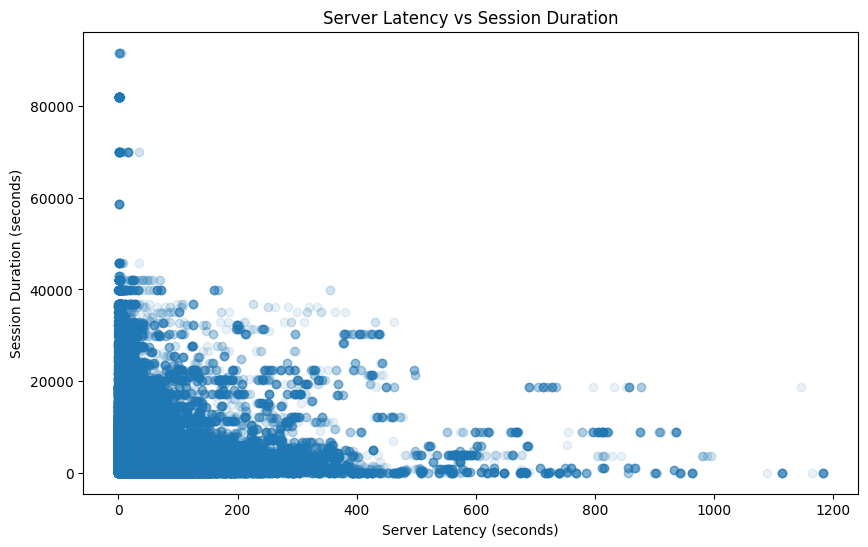

In [152]:
# Try to find if there is a correlation between server_latency and session_duration
print("\nCorrelation between server latency and session duration:")
correlation = df.groupby('session_id')[['server_latency', 'session_duration']].mean().corr()
print(correlation)

# Visualize the relationship
plt.figure(figsize=(10,6))
plt.scatter(df['server_latency'].dt.total_seconds(), 
           df['session_duration'].dt.total_seconds(),
           alpha=0.1)
plt.xlabel('Server Latency (seconds)')
plt.ylabel('Session Duration (seconds)')
plt.title('Server Latency vs Session Duration')
plt.show()


In [153]:
# Can you analyze all the null values in the dataset? for potential imputation?
null_counts = df.isnull().sum()
print("\nNull Value Counts:")
print(null_counts)


Null Value Counts:
$insert_id                   0
amplitude_id                 0
city                     33529
client_upload_time           0
country                      0
data                         0
device_family                0
device_id                    0
device_type             290077
dma                     512212
event_id                     0
event_properties             0
event_time                   0
event_type                   0
language                     0
os_name                      0
os_version                   0
processed_time               0
region                   16514
server_received_time         0
server_upload_time           0
session_id                   0
user_id                   3863
user_properties              0
uuid                         0
session_duration             0
hour                         0
day_of_week                  0
server_latency               0
processing_latency           0
dtype: int64


In [154]:
# Drop $insert_id, user_id, amplitude_id, device_id, uuid, and user_properties columns... because session_id is the only column that is not null and important
try:
    df = df.drop(columns=['$insert_id', 'user_id', 'amplitude_id', 'device_id', 'uuid', 'user_properties'])
except KeyError:
    pass

In [155]:
# Drop device_type because it has less unique values and has more nulls than device_family
df = df.drop(columns=['device_type'])

In [156]:
# Check device_family value counts
print("\nDevice Family Value Counts:")
print(df['device_family'].value_counts())
# Check os_name value counts
print("\nOS Name Value Counts:")
print(df['os_name'].value_counts())


Device Family Value Counts:
device_family
Windows     1512987
Mac OS X     288064
Linux         42944
iOS            2013
Android          22
Name: count, dtype: int64

OS Name Value Counts:
os_name
Chrome               1703592
Edge                  131233
Firefox                 8537
Mobile Safari           1819
Safari                   633
Chrome Mobile iOS        159
Edge Mobile               35
Chrome Mobile             22
Name: count, dtype: int64


Number of outliers removed: 45853


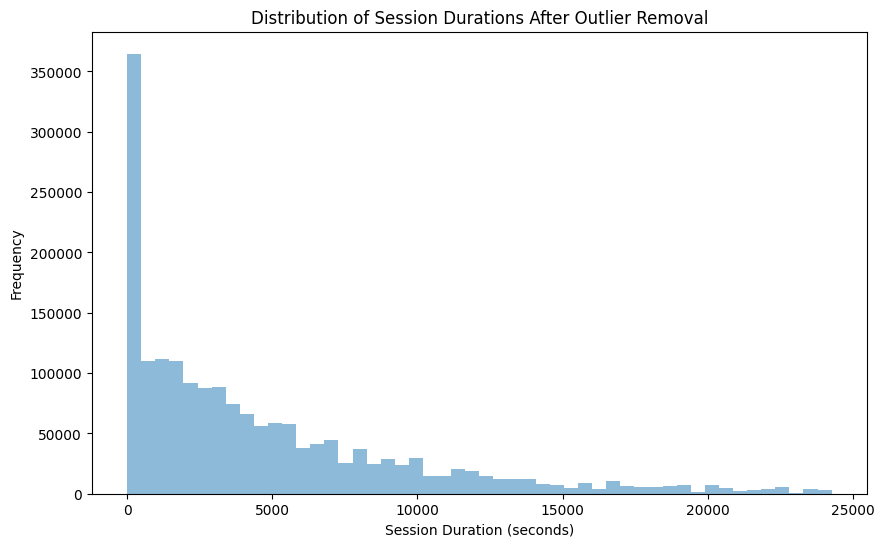

In [157]:
import numpy as np

# Identify and remove outliers
# Calculate z-scores for session_duration
z_scores = np.abs((df['session_duration'] - df['session_duration'].mean()) / df['session_duration'].std())

# Remove rows where z-score > 3 (more than 3 standard deviations from mean)
df = df[z_scores < 3]

# Print how many outliers were removed
print(f"Number of outliers removed: {len(z_scores[z_scores >= 3])}")

# Plot histogram of session durations before and after outlier removal
plt.figure(figsize=(10, 6))
plt.hist(df['session_duration'].dt.total_seconds(), bins=50, alpha=0.5)
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Session Durations After Outlier Removal')
plt.show()

In [170]:
short_sessions = df[df['session_duration'].dt.total_seconds() < 5]

print("\nAnalysis of Very Short Sessions (<5 seconds):")
print(f"Number of short sessions: {len(short_sessions)} ({len(short_sessions)/len(df)*100:.2f}% of total)")

print("\nEvent Sequences in Short Sessions:")
short_session_sequences = df[df['session_id'].isin(short_sessions['session_id'])]
short_session_sequences = short_session_sequences.sort_values(['session_id', 'event_time'])

for session_id in short_session_sequences['session_id'].unique()[:10]:  # Show first 5 sessions
    session_events = short_session_sequences[short_session_sequences['session_id'] == session_id]
    print(f"\nSession {session_id}:")
    print(f"Session Duration: {session_events['session_duration'].iloc[0]}")
    for _, event in session_events.iterrows():
        print(f"{event['event_type']} -> ", end="")

print("\nAverage number of events in short sessions:", 
      len(short_session_sequences) / len(short_sessions['session_id'].unique()))

print("\nMost common first events in short sessions:")
first_events = short_session_sequences.groupby('session_id').first()['event_type'].value_counts().head()
print(first_events)

print("\nMost common last events in short sessions:")
last_events = short_session_sequences.groupby('session_id').last()['event_type'].value_counts().head()
print(last_events)


Analysis of Very Short Sessions (<5 seconds):
Number of short sessions: 87672 (4.88% of total)

Event Sequences in Short Sessions:

Session 1722928751749:
Session Duration: 0 days 00:00:00.006000
session_start -> session_end -> 
Session 1729277741239:
Session Duration: 0 days 00:00:00.001000
::nav-header:user-signed-out -> session_end -> 
Session 1732051335347:
Session Duration: 0 days 00:00:00.001000
session_start -> session_end -> 
Session 1732051335348:
Session Duration: 0 days 00:00:04.981000
application-window-opened -> agency-dashboard:::view -> agency-dashboard::layout:render -> agency-dashboard::widget:render -> agency-dashboard::widget:render -> agency-dashboard::configurable-table:render -> agency-dashboard::configurable-table:render -> session_start -> 
Session 1732641676720:
Session Duration: 0 days 00:00:00.001000
::nav-header:user-signed-out -> session_end -> 
Session 1733314533530:
Session Duration: 0 days 00:00:00.004000
session_start -> session_end -> 
Session 1733337

In [ ]:
session_events = df.groupby('session_id')['event_type'].agg(list)
all_end_sessions = session_events[session_events.apply(lambda x: all(event == 'session_end' for event in x))].index

df = df[~df['session_id'].isin(all_end_sessions)]

print(f"Removed {len(all_end_sessions)} sessions that contained only 'session_end' events")


Removed 24 sessions that contained only 'session_end' events


In [160]:
# It seems like there are barely any mobile users, so we need to drop iOS device_family and Android device_family rows
df = df[~df['device_family'].isin(['iOS', 'Android'])]
# Check if there are any rows with device_family == 'iOS' or 'Android'
print("\nRows with device_family == 'iOS' or 'Android':")
print(df[df['device_family'].isin(['iOS', 'Android'])])


Rows with device_family == 'iOS' or 'Android':
Empty DataFrame
Columns: [city, client_upload_time, country, data, device_family, dma, event_id, event_properties, event_time, event_type, language, os_name, os_version, processed_time, region, server_received_time, server_upload_time, session_id, session_duration, hour, day_of_week, server_latency, processing_latency]
Index: []

[0 rows x 23 columns]



Platform Support Analysis:

OS Name vs Session Duration Correlation:
os_name
Firefox   0 days 01:21:49.271445355
Chrome    0 days 01:17:44.204028528
Edge      0 days 01:08:27.042162169
Safari    0 days 00:09:26.022189573
Name: session_duration, dtype: timedelta64[ns]

OS Version vs Session Duration Correlation:
os_version
132   0 days 01:25:39.652527785
134   0 days 01:23:32.553056856
119   0 days 01:16:52.606041477
131   0 days 01:15:45.772783834
133   0 days 01:02:27.981600877
128   0 days 01:02:22.175093277
130   0 days 00:58:19.275986291
109   0 days 00:45:34.867365695
127   0 days 00:35:04.816042237
17    0 days 00:13:44.613542005
111      0 days 00:12:43.984000
129   0 days 00:10:50.750546536
124   0 days 00:07:29.065839506
18    0 days 00:03:24.582003787
94       0 days 00:03:03.470000
123   0 days 00:01:52.954428571
122   0 days 00:01:52.307133333
125   0 days 00:00:19.121571428
110      0 days 00:00:08.224000
Name: session_duration, dtype: timedelta64[ns]

Device Family vs Se

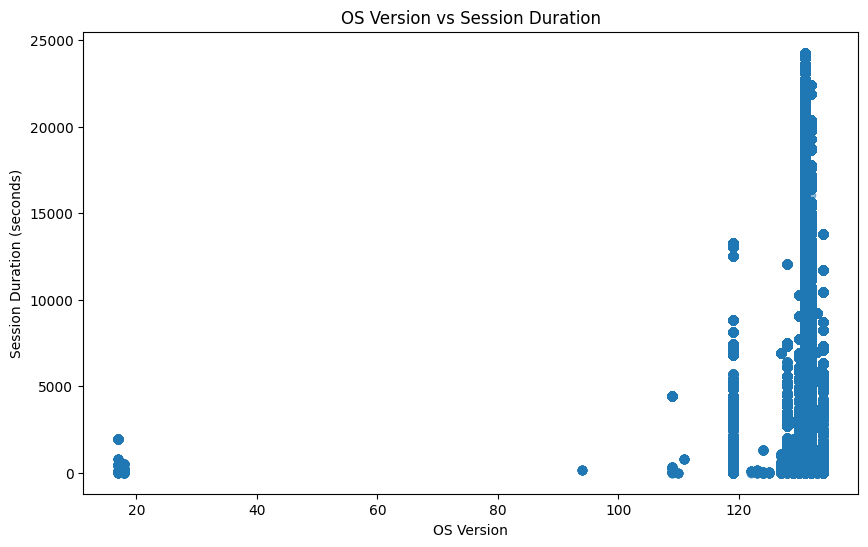

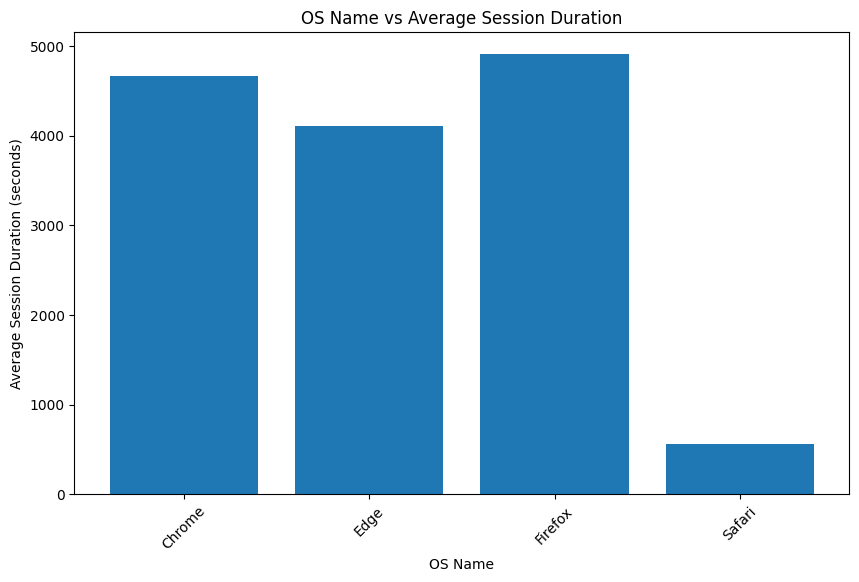

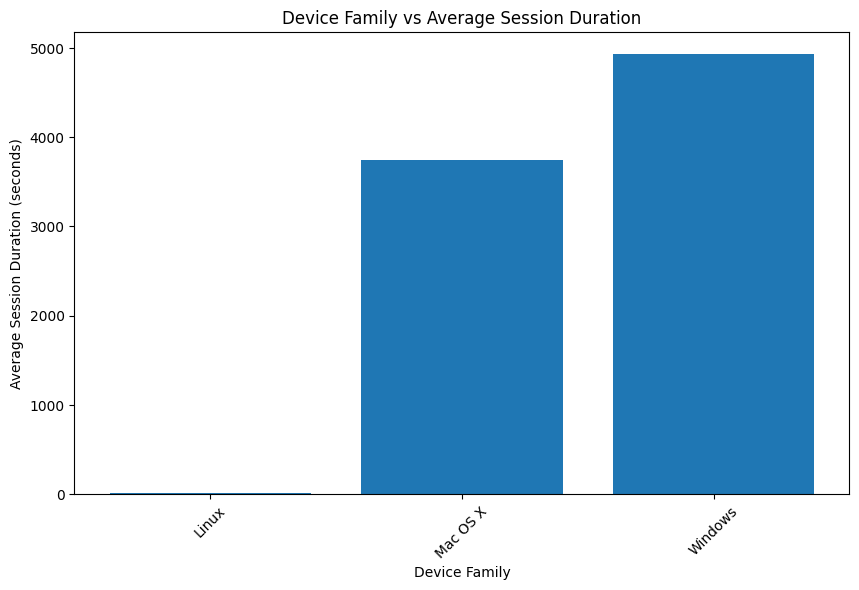

In [161]:
print("\nPlatform Support Analysis:")
print("="*70)

correlations = {
    'OS Name': df.groupby('os_name')['session_duration'].mean().sort_values(ascending=False),
    'OS Version': df.groupby('os_version')['session_duration'].mean().sort_values(ascending=False),
    'Device Family': df.groupby('device_family')['session_duration'].mean().sort_values(ascending=False)
}

for metric, data in correlations.items():
    print(f"\n{metric} vs Session Duration Correlation:")
    print(data)

plt.figure(figsize=(10, 6))
plt.scatter(df['os_version'], df['session_duration'].dt.total_seconds(), alpha=0.5)
plt.xlabel('OS Version')
plt.ylabel('Session Duration (seconds)')
plt.title('OS Version vs Session Duration')
plt.show()

plt.figure(figsize=(10, 6))
means = df.groupby('os_name')['session_duration'].mean()
plt.bar(means.index, means.dt.total_seconds())
plt.xlabel('OS Name')
plt.ylabel('Average Session Duration (seconds)')
plt.title('OS Name vs Average Session Duration')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
means = df.groupby('device_family')['session_duration'].mean()
plt.bar(means.index, means.dt.total_seconds())
plt.xlabel('Device Family')
plt.ylabel('Average Session Duration (seconds)')
plt.title('Device Family vs Average Session Duration')
plt.xticks(rotation=45)
plt.show()

In [162]:
# Output rows with city + region as null
print("\nRows with city + region as null:")
print(df[df['city'].isnull() & df['region'].isnull()].shape)



Rows with city + region as null:
(16387, 23)


In [163]:
# Which of region /city has more unique values
print("\nUnique values in region:")
print(df['region'].nunique())
print("\nUnique values in city:")
print(df['city'].nunique())


Unique values in region:
66

Unique values in city:
449


In [175]:
print("\nData Cleaning Strategy:")
print("="*70)

# For city-region mapping, we'll use the most common region for each city
print("\n2. dma (Designated Market Area):")
try:
    print(f"Null percentage: {(df['dma'].isnull().sum() / len(df)) * 100:.2f}%")
    # Drop DMA column as it's redundant with other location data
    df = df.drop('dma', axis=1)
except KeyError:
    pass

print("\n3 & 4. City and Region:")
print(f"City null percentage: {(df['city'].isnull().sum() / len(df)) * 100:.2f}%")
print(f"Region null percentage: {(df['region'].isnull().sum() / len(df)) * 100:.2f}%")

# Create city-region mapping from known data
city_region_map = df[df['region'].notna()].groupby('city')['region'].agg(lambda x: x.mode()[0]).to_dict()

# Fill missing regions based on city
df.loc[df['region'].isnull(), 'region'] = df.loc[df['region'].isnull(), 'city'].map(city_region_map)

# For remaining nulls in region, use a simple mode imputation
if df['region'].isnull().any():
    most_common_region = df['region'].mode()[0]
    df['region'] = df['region'].fillna(most_common_region)

# 5. user_id - Small number of nulls
try:
    print("\n5. user_id:")
    print(f"Null percentage: {(df['user_id'].isnull().sum() / len(df)) * 100:.2f}%")
    # Drop rows with null user_ids
    df = df.dropna(subset=['user_id'])
except KeyError:
    pass

print("\nFinal null check:")
print(df.isnull().sum()[df.isnull().sum() > 0])


Data Cleaning Strategy:

2. dma (Designated Market Area):

3 & 4. City and Region:
City null percentage: 1.86%
Region null percentage: 0.00%

5. user_id:

Final null check:
city            33480
city_encoded    33480
dtype: int64



Analyzing Features Impacting User Retention (Session Duration)

Mean Session Duration by device_family:
                                   mean    count
device_family                                   
Windows       0 days 01:34:23.719007378  1512987
Mac OS X      0 days 01:04:44.436981490   288064
iOS           0 days 00:18:43.864713859     2013
Linux         0 days 00:00:13.954530039    42944

Mean Session Duration by os_name:
                                   mean    count
os_name                                         
Chrome        0 days 01:29:06.028122547  1703592
Firefox       0 days 01:21:49.271445355     8537
Edge          0 days 01:08:27.042162169   131233
Mobile Safari 0 days 00:20:24.432293567     1819

Mean Session Duration by day_of_week:
                                 mean   count
day_of_week                                  
Monday      0 days 01:37:41.870525969  352899
Thursday    0 days 01:32:58.586148180  405647
Friday      0 days 01:26:25.250034861  363006
Wed

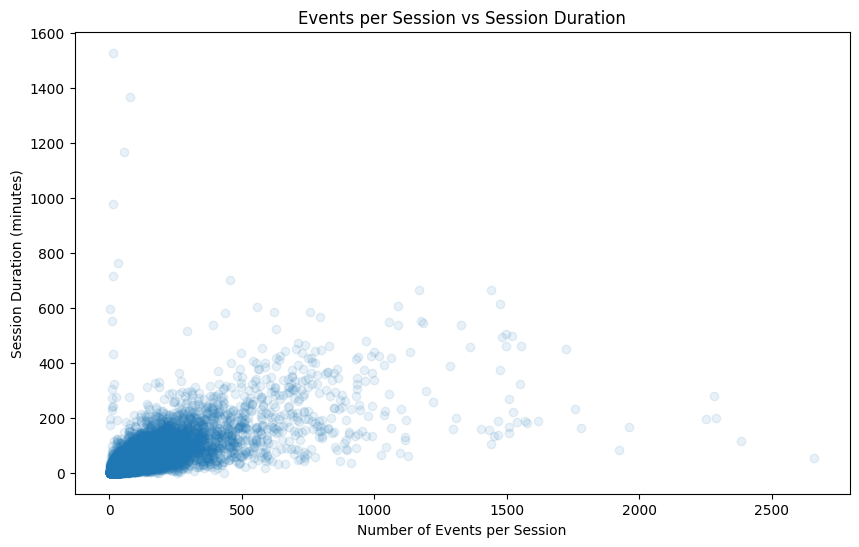

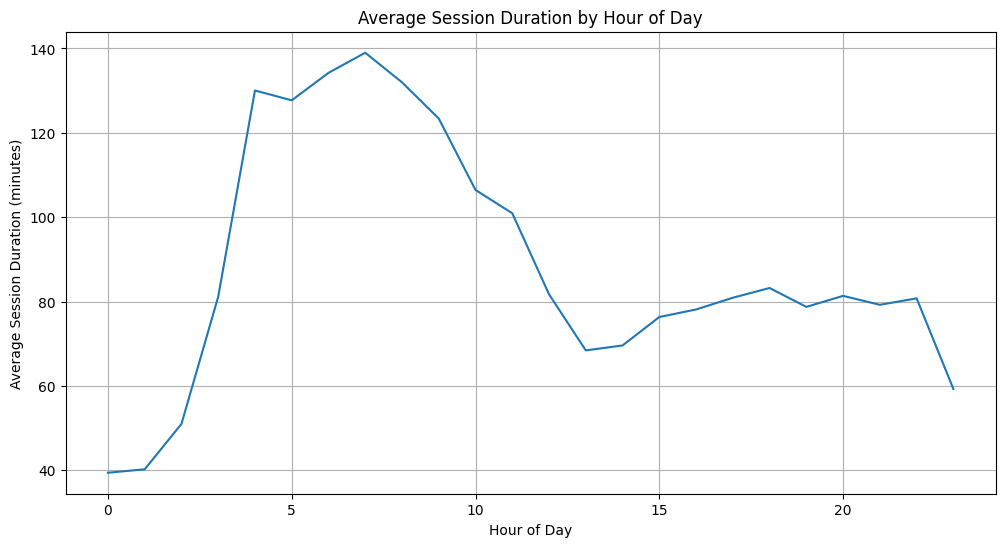

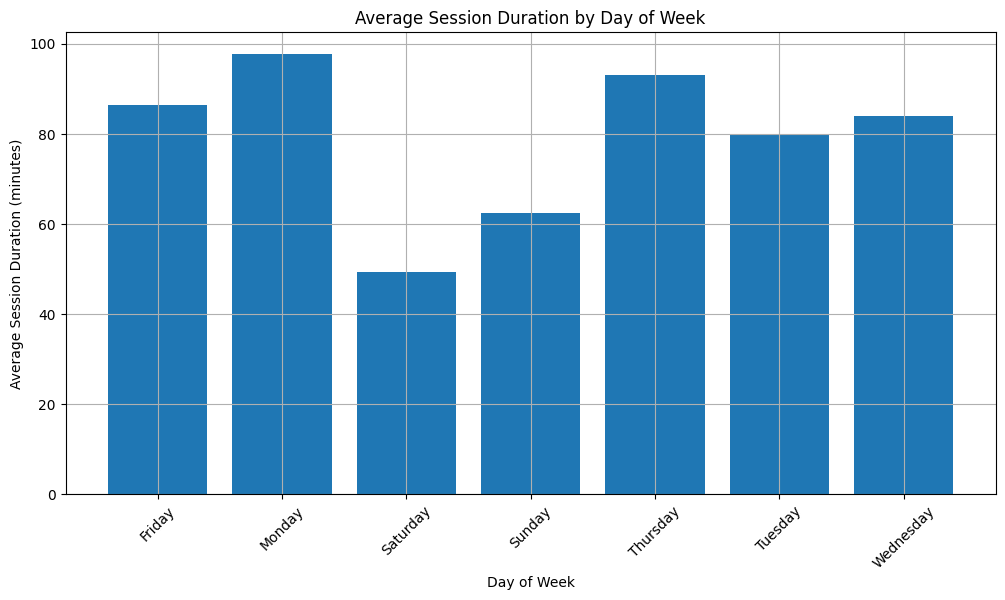

In [90]:
print("\nAnalyzing Features Impacting User Retention (Session Duration)")
print("="*70)

features_for_analysis = ['device_family', 'os_name', 'day_of_week', 'hour', 'city', 'region']

for feature in features_for_analysis:
    print(f"\nMean Session Duration by {feature}:")
    mean_duration = df.groupby(feature)['session_duration'].agg(['mean', 'count'])
    significant_groups = mean_duration[mean_duration['count'] > 1000]
    print(significant_groups.sort_values('mean', ascending=False))

events_per_session = df.groupby('session_id').size()
session_stats = pd.DataFrame({
    'num_events': events_per_session,
    'duration': df.groupby('session_id')['session_duration'].first()
})

print("\nCorrelation between number of events and session duration:")
print(session_stats.corr())

plt.figure(figsize=(10,6))
plt.scatter(session_stats['num_events'], 
           session_stats['duration'].dt.total_seconds()/60,
           alpha=0.1)
plt.xlabel('Number of Events per Session')
plt.ylabel('Session Duration (minutes)')
plt.title('Events per Session vs Session Duration')
plt.show()

plt.figure(figsize=(12,6))
hourly_retention = df.groupby('hour')['session_duration'].mean()
plt.plot(hourly_retention.index, hourly_retention.dt.total_seconds()/60)
plt.xlabel('Hour of Day')
plt.ylabel('Average Session Duration (minutes)')
plt.title('Average Session Duration by Hour of Day')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
daily_retention = df.groupby('day_of_week')['session_duration'].mean()
plt.bar(daily_retention.index, daily_retention.dt.total_seconds()/60)
plt.xlabel('Day of Week')
plt.ylabel('Average Session Duration (minutes)')
plt.title('Average Session Duration by Day of Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


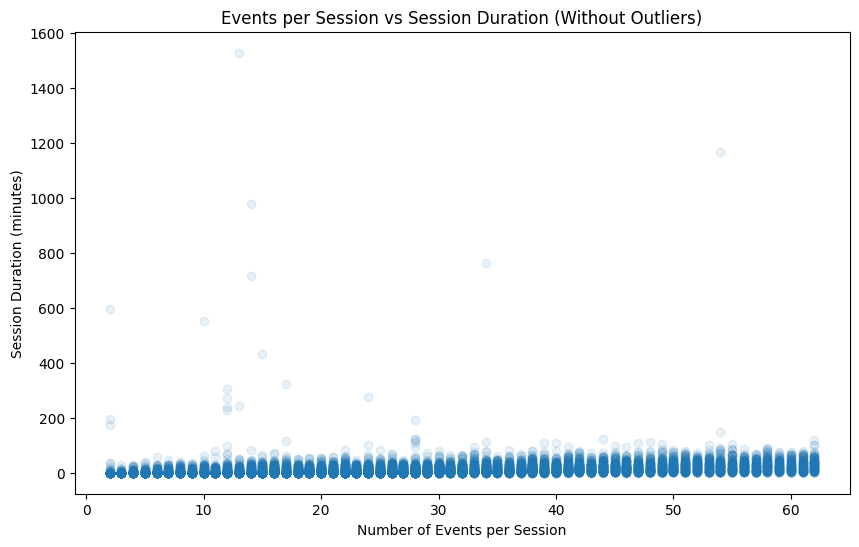


Correlation between number of events and session duration (without outliers):
            num_events  duration
num_events    1.000000  0.402528
duration      0.402528  1.000000


In [91]:
Q1_events = session_stats['num_events'].quantile(0.25)
Q3_events = session_stats['num_events'].quantile(0.75)
IQR_events = Q3_events - Q1_events

Q1_duration = session_stats['duration'].dt.total_seconds()/60
Q3_duration = session_stats['duration'].dt.total_seconds()/60
IQR_duration = Q3_duration - Q1_duration

filtered_stats = session_stats[
    (session_stats['num_events'] >= Q1_events - 1.5 * IQR_events) &
    (session_stats['num_events'] <= Q3_events + 1.5 * IQR_events) &
    (session_stats['duration'].dt.total_seconds()/60 >= Q1_duration - 1.5 * IQR_duration) &
    (session_stats['duration'].dt.total_seconds()/60 <= Q3_duration + 1.5 * IQR_duration)
]

plt.figure(figsize=(10,6))
plt.scatter(filtered_stats['num_events'], 
           filtered_stats['duration'].dt.total_seconds()/60,
           alpha=0.1)
plt.xlabel('Number of Events per Session')
plt.ylabel('Session Duration (minutes)')
plt.title('Events per Session vs Session Duration (Without Outliers)')
plt.show()

print("\nCorrelation between number of events and session duration (without outliers):")
print(filtered_stats.corr())